In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

2024-02-11 13:04:56.631094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 13:04:56.631258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 13:04:56.799134: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])
# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [3]:
data = []
paths = []
result = []

for r,d,f in os.walk(r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
    

In [4]:

paths = []


for r,d,f in os.walk(r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

In [8]:
model= Sequential()

model.add(Conv2D(32, kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32, kernel_size=(2,2),activation='relu',padding='Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size = (2,2),activation='relu',padding='Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [9]:
y_train.shape

(111, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 7s 2s/step - loss: 22.2198 - val_loss: 100.6600
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 29.6946 - val_loss: 22.2489
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 9.4713 - val_loss: 22.5975
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 7.2269 - val_loss: 9.0945
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 2.8259 - val_loss: 13.5836
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 0.9862 - val_loss: 24.2048
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 1.2683 - val_loss: 24.3711
Epoch 8/30
3/3 [==============================] - 4s 1s/step - loss: 0.9133 - val_loss: 16.8867
Epoch 9/30
3/3 [==============================] - 4s 1s/step - loss: 0.4301 - val_loss: 11.1697
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.1632 - val_loss: 7.5078
Epoch 11/30
3/3 [=====================

# ***Plotting Losses***

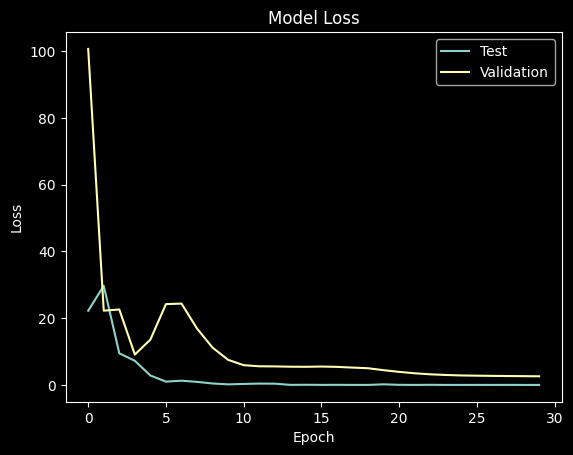

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# ***Checking the model***

In [12]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


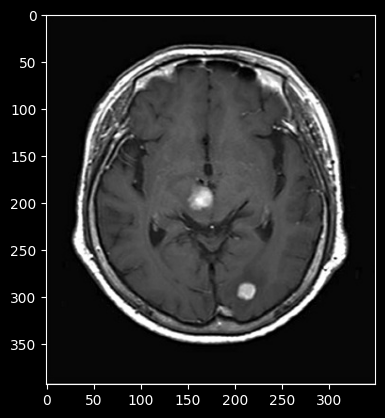

In [13]:
from matplotlib.pyplot import imshow


img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.24346208572388% Confidence This Is A Its a Tumor


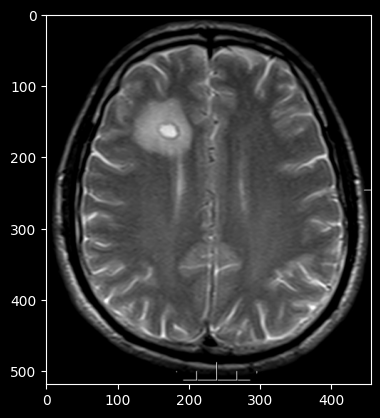

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

99.96150732040405% Confidence This Is Its a Tumor


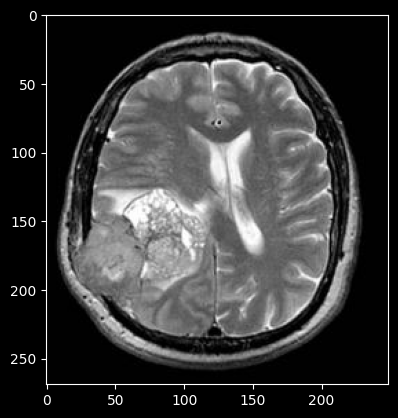

In [15]:
from matplotlib.pyplot import imshow


img = Image.open(r"/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y116.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))